In [23]:
#importing necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
from lmfit import Model
from matplotlib.ticker import MultipleLocator, AutoLocator
mlp.style.use("classic") #giving a specified style to a plot

[[Model]]
    Model(ffit, prefix='V_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6314
    # data points      = 83
    # variables        = 25
    chi-square         = 4293.89569
    reduced chi-square = 74.0326844
    Akaike info crit   = 377.527054
    Bayesian info crit = 437.998069
[[Variables]]
    V_a1:      2.10435495 +/- 1.88537140 (89.59%) (init = 2.7)
    V_tmax1:   5.99891487 +/- 1.02483830 (17.08%) (init = 5)
    V_rise1:   7.8015e-04 +/- 0.73391562 (94073.27%) (init = 1.22)
    V_decay1:  6.83514445 +/- 3.18792139 (46.64%) (init = 10)
    V_n1:      2.12654244 +/- 1.28401531 (60.38%) (init = 1.07)
    V_a2:      1.66587002 +/- 0.83242181 (49.97%) (init = 2.1)
    V_tmax2:   22.4091881 +/- 0.68718505 (3.07%) (init = 23)
    V_rise2:   5.60996318 +/- 2280739.49 (40655159.69%) (init = 1.93)
    V_decay2:  5.60995049 +/- 2280709.16 (40654711.09%) (init = 2.97)
    V_n2:      0.99091230 +/- 1.63865292 (165.37%) (init = 1.43)
    V_a3:      1.26

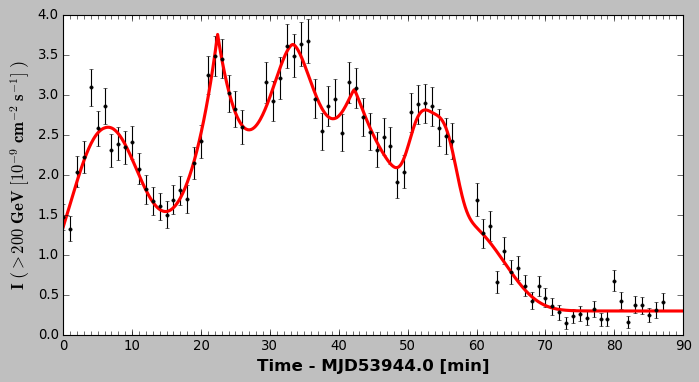

In [24]:
#reading data from a .txt file
t, flux, flux_err = np.loadtxt("/home/mher/Desktop/data for PKS 2155-304.txt",unpack=True)

#changing data for adapting axis scales
flux = flux *10**9
flux_err = flux_err*10**9
t = (t - 53944.02568281) * 86400/60 #to return minutes, instead of MJDs

#definig a functions which will fit the data 

def ffit(t,a1,tmax1,rise1,decay1,n1,a2,tmax2,rise2,decay2,n2,a3,tmax3,rise3,decay3,n3,a4,tmax4,rise4,
        decay4,n4,a5,tmax5,rise5,decay5,n5):
    
    return 0.3+a1*np.exp(-(abs(t-tmax1)/rise1)**n1)+a1*np.exp(-(abs(t-tmax1)/decay1)**n1)+a2*np.exp(-(abs(t-tmax2)/rise2)**n2)+a2*np.exp(-(abs(t-tmax2)/decay2)**n2)+a3*np.exp(-(abs(t-tmax3)/rise3)**n3)+a3*np.exp(-(abs(t-tmax3)/decay3)**n3)+a4*np.exp(-(abs(t-tmax4)/rise4)**n4)+a4*np.exp(-(abs(t-tmax4)/decay4)**n4)+a5*np.exp(-(abs(t-tmax5)/rise5)**n5)+a5*np.exp(-(abs(t-tmax5)/decay5)**n5)





#plotting

fig, ax = plt.subplots(figsize = (10,5)) #configuring figure size

#creating error graph of our data 

plt.errorbar(t,flux, yerr =flux_err, fmt = ".-", ecolor="k", elinewidth=1.002,ls = ":", lw = 0, color= "k", capsize=1.98)



# configuring y axis
plt.ylim(0,4)
ytext = r'$ \mathbf {I\ \left(>200\ GeV\ [10^{-9}\ cm^{-2}\ s^{-1} ]\ \right)} $'
plt.ylabel(ytext, fontweight = "bold", fontsize = 15)

#configuring  x axis

xtext = "Time - MJD53944.0 [min]"
plt.xlabel(xtext, fontsize = 15, fontweight = "bold")
plt.xlim(0,90)
#configuring ticks

xminorlocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(xminorlocator)
ax.tick_params(which = "major",length = 5.7 )
ax.tick_params(which = "minor", length = 3.9)

#implementing lmfit

fitmodel = Model(ffit,prefix='V_') #giving a fitting Model

#set up variables 
fitmodel.set_param_hint("a1",value = 2.7, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax1",value = 5, min =1, max =7)
fitmodel.set_param_hint("rise1",value = 1.22, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay1",value = 10, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n1",value = 1.07, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a2",value = 2.1, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax2",value = 23, min = 20, max = 25)
fitmodel.set_param_hint("rise2",value = 1.93, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay2",value = 2.97, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n2",value = 1.43, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a3",value = 3.1, min = -np.inf, max = np.inf) #3.1
fitmodel.set_param_hint("tmax3",value = 35.5, min =32, max = 36)
fitmodel.set_param_hint("rise3",value = 6.73, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay3",value = 4.48, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n3",value = 1.59, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a4",value = 2.0, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax4",value = 41.5, min =40, max =43)
fitmodel.set_param_hint("rise4",value = 2.97, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay4",value = 10.95, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n4",value = 2.01, min = -np.inf, max = np.inf)

fitmodel.set_param_hint("a5",value = 1.5, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("tmax5",value = 52.5, min = 50, max =54)
fitmodel.set_param_hint("rise5",value = 1.12, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("decay5",value = 10.3, min = -np.inf, max = np.inf)
fitmodel.set_param_hint("n5",value = 2.44, min = -np.inf, max = np.inf)

params = fitmodel.make_params()

tx = np.linspace(0,90,800) #for giving more values to t data
result = fitmodel.fit(flux,params, t = t, nan_policy="propagate", weights=1/flux_err**2) #evaluate parameteres for fiting data.
#fitting plot
comps = result.eval_components(t=tx)
plt.plot(tx,comps["V_"], color = 'r', lw = 2.8)


print(result.fit_report(show_correl=False))
#plt.savefig("C:/Users/user/Desktop/LMFIT.pdf", dpi = 400)

plt.show()

